In [49]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import os
import difflib
from scipy.sparse import csr_matrix
import pandas as pd
dir_data = os.path.realpath('../data')
dir_results = os.path.realpath('../result')

In [50]:
# load the data
df_train = pd.read_csv(dir_data + '/' +'train.csv' , usecols = ['msno','song_id','target'])

#### split data

In [82]:
# split the train data manually, use a portion of it
pd_train = df_train.iloc[0:5900000,:]
pd_test = df_train.iloc[5900000:,:]

In [83]:
id_user = pd_train.msno.unique()
id_user = pd.DataFrame(id_user, columns=['msno'])
id_item = pd_train.song_id.unique()
id_item = pd.DataFrame(id_item, columns=['song_id'])

id_user = id_user.reset_index()
id_item = id_item.reset_index()

id_user = id_user.rename(index = str, columns = {"index":"user_id"})
id_item = id_item.rename(index = str, columns = {"index":"item_id"})

pd_train = pd.merge(pd_train, id_user, on="msno")
pd_train = pd.merge(pd_train, id_item, on="song_id")

pd_test = pd.merge(pd_test, id_user, on="msno")
pd_test = pd.merge(pd_test, id_item, on="song_id")

In [85]:
pd_train.to_csv(dir_data + '/' +'7M_train_top80_withId.csv', index = False)
pd_test.to_csv(dir_data + '/' + '7M_test_last20_withId.csv', index = False)

#### contruct song_id, user_id

In [86]:
df_pd_user = pd_train[['user_id','msno']].drop_duplicates(['user_id'])
df_pd_song = pd_train[['item_id', 'song_id']].drop_duplicates(['item_id'])

In [84]:
pd_train

,msno,song_id,target,user_id,item_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,0,0
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,0,6,0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,56,0
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,274,0
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,0,275,0
5,YqtKhiDOFJ/gdd2V4AFdnVwGMMaA0yUEbb8w7xuoP7I=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,0,286,0
6,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,294,0
7,7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,0,317,0
8,z2IYoGWjJJPv4ySp+1lCIfU1APu2YRHsjY2sy2ehq0k=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,0,336,0
9,oKMHFr1nozVUOW4TP9bcbtVhgCt5gh+22fJ1mUXx9eM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,370,0


# Use pyspark

In [57]:
import findspark
findspark.init('/home/zm2303/spark')
import pyspark

In [58]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.types import DoubleType
from pyspark.sql.types import IntegerType

In [59]:
# build a spark session
spark = SparkSession\
    .builder\
    .appName("ALS")\
    .getOrCreate()

In [87]:
# load data
data_train = spark.read.csv(dir_data + '/' +'1M_train_top80.csv', header = True, inferSchema = True, sep = ',')
data_test = spark.read.csv(dir_data + '/' +'1M_test_last20.csv', header = True, inferSchema = True, sep = ',')

In [88]:
train = data_train
test = data_test

In [ ]:
from pyspark import SQLContext

In [ ]:
spark2 = SparkSession.builder \
    .master("yarn") \
    .appName("AspectDetector") \
    .enableHiveSupport() \
    .getOrCreate()

sqlContext = SQLContext(spark2)
df_song.registerTempTable("temp_song")

# model

In [89]:
als_iter10_r10 = ALS(maxIter = 20, regParam=0.01, userCol='user_id', itemCol="item_id",ratingCol="target",
         coldStartStrategy="drop", rank =10)
model_iter10_r10 = als_iter10_r10.fit(train)

In [ ]:
als_iter10_r20 = ALS(maxIter = 20, regParam=0.01, userCol='user_id', itemCol="item_id",ratingCol="target",
         coldStartStrategy="drop", rank =20)
model_iter10_r20 = als_iter10_r20.fit(sp_train)

In [ ]:
# Evaluate the model
predictions_20 = model_iter10_r20.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol='target',
                               predictionCol="prediction")
rmse = evaluator.evaluate(predictions_20)
print(rmse)

In [ ]:
# Evaluate the model
predictions = model_iter10_r10.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol='target',
                               predictionCol="prediction")
rmse = evaluator.evaluate(predictions)

In [ ]:
predictions_20.printSchema()

In [ ]:
df_predict = predictions_20.select(["user_id", "item_id","prediction"])

# try to save the prediction
df_predict.repartition(1).write.format("com.databricks.spark.csv").option("header", "true").save("prediction_iter20_rank20.csv")

In [75]:
def split_feature(df, prex, n_feature):
    for i in range(0,n_feature):
        df[prex + '_' + str(i)] = df['features'].apply(lambda x:x[i])
    del(df['features'])
    return df

In [81]:
item_feature = model_iter10_r10.itemFactors
user_feature = model_iter10_r10.userFactors

df_item_feature = item_feature.toPandas()
df_user_feature = user_feature.toPandas()

df_item_feature = df_item_feature.rename(index = str, columns = {"id":"item_id"})
df_user_feature = df_user_feature.rename(index = str, columns = {"id":"user_id"})

df_item_feature = pd.merge(df_item_feature, df_pd_song, on = 'item_id')
df_user_feature = pd.merge(df_user_feature, df_pd_user, on = 'user_id')

df_item_feature = split_feature(df_item_feature, 'f_item', 10)
df_user_feature = split_feature(df_user_feature, 'f_user', 10)

#df_user_feature.to_csv(dir_results + '/' + 'user_feature_iter20_rank20.csv', index = False)
#df_item_feature.to_csv(dir_results + '/' + 'item_feature_iter20_rank20.csv', index = False )

# compare different K

In [5]:
data_train = spark.read.csv(dir_data + '/' +'train_80_with_id.csv', header = True, inferSchema = True, sep = ',')
data_test = spark.read.csv(dir_data + '/' +'test_20_with_id.csv', header = True, inferSchema = True, sep = ',')

In [6]:
train = data_train
test = data_test

In [ ]:
row1 = train.agg({"user_id":"max"}).collect()[0]
print(row1)

row2 = train.agg({"item_id":"max"}).collect()[0]
print(row2)

In [7]:
RMSE = []
for k in range(5,51,5):
    als = ALS(maxIter = 15, regParam=0.01, userCol='user_id', itemCol="item_id",ratingCol="target",
             coldStartStrategy="drop", rank =k)
    model = als.fit(train)

    predictions = model.transform(test)
    evaluator = RegressionEvaluator(metricName="rmse", labelCol='target',
                                   predictionCol="prediction")
    rmse = evaluator.evaluate(predictions)
    RMSE.append(rmse)
    print("k = {}  rmse = {}".format(k, rmse))

RMSE_iter20_5_5_50 = RMSE

k = 5  rmse = 0.5293664649436094
k = 10  rmse = 0.5352934637200764
k = 15  rmse = 0.5377621888612045
k = 20  rmse = 0.5389394289838869
k = 25  rmse = 0.5389258285383365
k = 30  rmse = 0.5386251400242117
k = 35  rmse = 0.5391164063246855
k = 40  rmse = 0.537800722830049
k = 45  rmse = 0.5377855393546176
k = 50  rmse = 0.5363282982044214


In [41]:
list(x for x in range(5,51,5))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

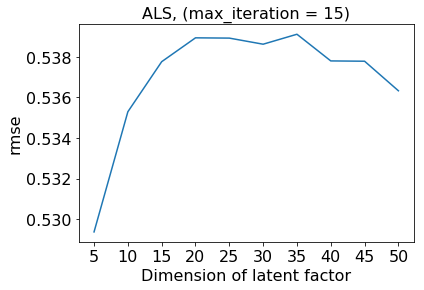

In [48]:
plt.plot(list(x for x in range(5,51,5)),RMSE_iter20_5_5_50)
plt.xticks(list(x for x in range(5,51,5)), fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("ALS, (max_iteration = 15)", fontsize = 16)
plt.xlabel("Dimension of latent factor", fontsize = 16)
plt.ylabel("rmse", fontsize = 16)
plt.savefig("ALS.png", bbox_inches = "tight", dpi = 300)

In [ ]:
RMSE_iter10_5_5_50

In [8]:
with open('RMSE_iter15_5_5_50.txt', 'w') as f:
    for item in RMSE_iter20_5_5_50:
        f.write("%f\n" % item)